In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

import nanonets_utils
import nanonets

def nand_fitness(I : np.array):

    on  = (I[0] + I[1] + I[2])/3
    off = I[3]
    res = np.sqrt(((I[0] - on)**2 + (I[1] - on)**2 + (I[2] - on)**2 + (I[3] - off)**2)/4)

    return (on - off)/res

def return_best_gate(current, fitness, gate='XOR'):

    gate_volts  = fitness.sort_values(by=f'{gate} Fitness', ascending=False, ignore_index=True).loc[:9,[f'C{i}' for i in range(1, 10)] + ['G',f'{gate} Fitness']]
    current_val = current[(current['C1']==gate_volts.loc[0,'C1']) & (current['C2']==gate_volts.loc[0,'C2'])]

    gate_volts.insert(9,'O',0)
    
    volt_val       = np.repeat(gate_volts.values,4,axis=0)
    i1             = np.tile([0.0,0.0,0.01,0.01], 10)
    i2             = np.tile([0.0,0.01,0.0,0.01], 10)
    volt_val       = pd.DataFrame(volt_val)
    volt_val[12]   = i1
    volt_val[13]   = i2
    volt_val       = volt_val[[0,12,13,1,2,3,4,5,6,7,8,9,10]]
    volt_val       = volt_val.iloc[:4,:]

    return volt_val, current_val, gate_volts

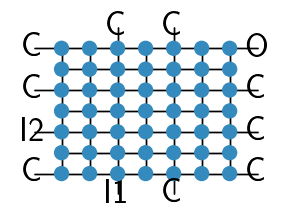

In [93]:
network_topology    = "cubic"
topology_parameter  = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[2,0,0],[0,2,0],[4,0,0],[0,4,0],[6,0,0],[0,6,0],[6,2,0],[2,6,0],[6,4,0],[4,6,0],[6,6,0]]
}

np_network_sim = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

with plt.style.context(["science","bright"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    fig, ax = nanonets_utils.display_network(np_network_sim=np_network_sim, fig=fig, ax=ax, node_size=100,
                                             provide_electrode_labels=['C','I1','I2','C','C','C','C','C','C','C','C','O'], font_size=25)

In [108]:
df1, df2    = nanonets_utils.get_boolean_data("data/", N=7, N_e=12, on_state=[0.01], i1_col=1, i2_col=2, o_col=11)
dff         = nanonets_utils.fitness(df1, 9)
gate        = 'AND'

volt_val, current_val, gate_volts = return_best_gate(df1, dff, gate)
gate_volts

,C1,C2,C3,C4,C5,C6,C7,C8,C9,O,G,AND Fitness
0,0.0084,-0.0148,0.0346,0.0029,0.0119,0.0257,-0.0212,0.0186,-0.0233,0,-0.0771,13.002887
1,0.0364,0.0267,0.0108,0.0028,0.0243,0.0493,0.0011,0.0246,-0.0390,0,0.0226,12.663354
2,-0.0166,0.0424,0.0362,-0.0451,-0.0246,-0.0054,-0.0395,-0.0152,0.0240,0,0.0562,11.043416
3,0.0308,-0.0455,-0.0492,-0.0138,-0.0436,-0.0351,-0.0477,0.0025,0.0197,0,0.0678,9.808182
4,0.0123,-0.0107,0.0477,-0.0184,-0.0233,0.0119,-0.0425,-0.0103,0.0106,0,-0.0877,9.773664
5,-0.0490,0.0424,-0.0171,-0.0360,-0.0245,0.0060,0.0261,0.0042,-0.0016,0,-0.0981,9.507329
6,-0.0064,-0.0474,0.0050,-0.0065,-0.0080,-0.0170,-0.0295,0.0119,-0.0200,0,-0.0489,7.865780
7,-0.0144,-0.0185,0.0390,0.0364,0.0306,-0.0143,0.0141,0.0099,-0.0264,0,0.0658,7.617723
8,0.0285,0.0247,0.0422,0.0199,0.0413,-0.0215,-0.0161,-0.0441,0.0367,0,0.0329,6.948524
9,-0.0441,0.0364,-0.0345,-0.0230,0.0048,-0.0248,0.0345,0.0002,-0.0015,0,-0.0753,6.870559


In [109]:
current_val

,I1,I2,C1,C2,C3,C4,C5,C6,C7,C8,C9,G,Jumps_eq,Jumps,Current,Error
3192,0.00,0.00,0.0084,-0.0148,0.0346,0.0029,0.0119,0.0257,-0.0212,0.0186,-0.0233,-0.0771,10000.0,100000.0,-6.9369,1.2232
3193,0.00,0.01,0.0084,-0.0148,0.0346,0.0029,0.0119,0.0257,-0.0212,0.0186,-0.0233,-0.0771,10000.0,100000.0,-6.2622,1.2217
3194,0.01,0.00,0.0084,-0.0148,0.0346,0.0029,0.0119,0.0257,-0.0212,0.0186,-0.0233,-0.0771,10000.0,100000.0,-6.5790,1.3258
3195,0.01,0.01,0.0084,-0.0148,0.0346,0.0029,0.0119,0.0257,-0.0212,0.0186,-0.0233,-0.0771,10000.0,100000.0,-2.6318,0.8680


<ErrorbarContainer object of 3 artists>

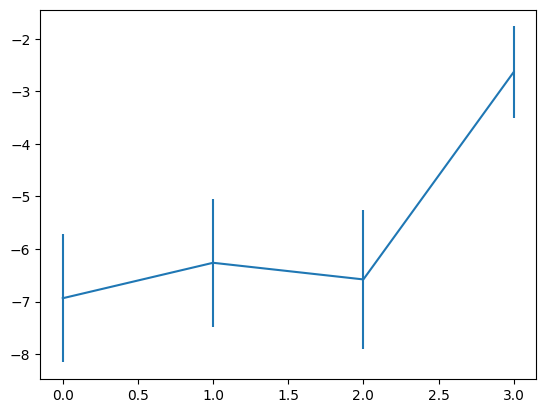

In [110]:
plt.errorbar(np.arange(4), current_val['Current'], current_val['Error'])

In [111]:
volt_val

,0,12,13,1,2,3,4,5,6,7,8,9,10
0,0.0084,0.00,0.00,-0.0148,0.0346,0.0029,0.0119,0.0257,-0.0212,0.0186,-0.0233,0.0,-0.0771
1,0.0084,0.00,0.01,-0.0148,0.0346,0.0029,0.0119,0.0257,-0.0212,0.0186,-0.0233,0.0,-0.0771
2,0.0084,0.01,0.00,-0.0148,0.0346,0.0029,0.0119,0.0257,-0.0212,0.0186,-0.0233,0.0,-0.0771
3,0.0084,0.01,0.01,-0.0148,0.0346,0.0029,0.0119,0.0257,-0.0212,0.0186,-0.0233,0.0,-0.0771


In [124]:
# Run Simulation
sim_dic = {
    "error_th"    : 0.01,
    "max_jumps"   : 1000000,
    "eq_steps"    : 10000
}

np_network_sim = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)
np_network_sim.run_const_voltages(voltages=volt_val.values, target_electrode=11, save_th=0.1, sim_dic=sim_dic)
results = pd.DataFrame(np_network_sim.return_output_values())

<ErrorbarContainer object of 3 artists>

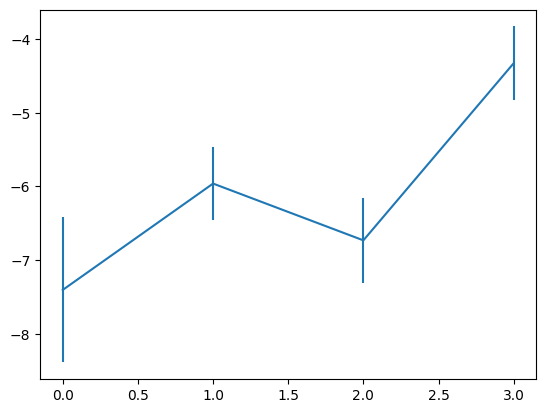

In [127]:
plt.errorbar(np.arange(4), results[2], 2*results[3])

In [126]:
print(nand_fitness(results[2].values))

-4.64285448280121
